In [1]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
from sklearn import model_selection
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

C:\Users\rodelga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_root_dir = r'D:\CIC\Train and Test\Filtered 40 - RF'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()


# 'n_estimators' is equal to the numebr of trees
adaBoost1 = AdaBoostClassifier(n_estimators=100)
adaBoost1.fit(X_train, y_train)

predictions = adaBoost1.predict(X_test)
confusion_matrix(y_test, predictions)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

print(f"Total time: {endTime - startTime:0.4f} seconds \n")

Total time: 4142.1101 seconds 



In [4]:
results = confusion_matrix(y_test, predictions)
error = zero_one_loss(y_test, predictions)
score = accuracy_score(y_test, predictions) * 100
report = classification_report(y_test, predictions)


In [5]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("AdaBoost Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{results[0]}")
print(f"{results[1]} \n")

print("Report :")
print(report) 

print(f"True Postive   : {results[0][0]}")
print(f"False Positive : {results[0][1]}")
print(f"False Negative : {results[1][0]}")
print(f"True Negative  : {results[1][1]}")
print(f"Error Value    : {error}")
print(f"Accuracy_Score : {score}")
print("=================================================")

Total time: 4142.1101 seconds 

AdaBoost Classifier Results
Confusion Matrix:
[3981528   35142]
[422353 402150] 

Report :
              precision    recall  f1-score   support

           0       0.90      0.99      0.95   4016670
           1       0.92      0.49      0.64    824503

    accuracy                           0.91   4841173
   macro avg       0.91      0.74      0.79   4841173
weighted avg       0.91      0.91      0.89   4841173

True Postive   : 3981528
False Positive : 35142
False Negative : 422353
True Negative  : 402150
Error Value    : 0.0945008575401044
Accuracy_Score : 90.54991424598956


In [6]:
X_test.shape

(4841173, 39)

In [7]:
feature_importances = pd.Series(adaBoost1.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Bwd Pkt Len Max      0.15
Tot Fwd Pkts         0.13
Fwd Pkt Len Std      0.10
Idle Mean            0.07
Bwd IAT Max          0.07
Bwd IAT Min          0.06
Idle Max             0.05
Bwd Pkt Len Std      0.05
Pkt Len Mean         0.04
Subflow Bwd Pkts     0.04
Bwd Seg Size Avg     0.04
TotLen Bwd Pkts      0.03
Fwd Act Data Pkts    0.03
URG Flag Cnt         0.03
Active Max           0.02
ECE Flag Cnt         0.02
Protocol             0.02
FIN Flag Cnt         0.01
Fwd Pkt Len Min      0.01
Bwd Pkt Len Min      0.01
Bwd Pkt Len Mean     0.01
Fwd PSH Flags        0.01
Pkt Len Min          0.00
Idle Std             0.00
Active Min           0.00
Active Std           0.00
Active Mean          0.00
Bwd Blk Rate Avg     0.00
Bwd Pkts/b Avg       0.00
Bwd Byts/b Avg       0.00
Fwd Blk Rate Avg     0.00
Fwd Pkts/b Avg       0.00
Fwd Byts/b Avg       0.00
Bwd PSH Flags        0.00
Fwd URG Flags        0.00
CWE Flag Count       0.00
Bwd URG Flags        0.00
Timestamp            0.00
SYN Flag Cnt

Top 20 features:
---------------------------------
Bwd Pkt Len Max      0.15
Tot Fwd Pkts         0.13
Fwd Pkt Len Std      0.10
Bwd IAT Max          0.07
Idle Mean            0.07
Bwd IAT Min          0.06
Bwd Pkt Len Std      0.05
Idle Max             0.05
Pkt Len Mean         0.04
Bwd Seg Size Avg     0.04
Subflow Bwd Pkts     0.04
TotLen Bwd Pkts      0.03
URG Flag Cnt         0.03
Fwd Act Data Pkts    0.03
Protocol             0.02
ECE Flag Cnt         0.02
Active Max           0.02
Fwd Pkt Len Min      0.01
Bwd Pkt Len Min      0.01
Bwd Pkt Len Mean     0.01
dtype: float64


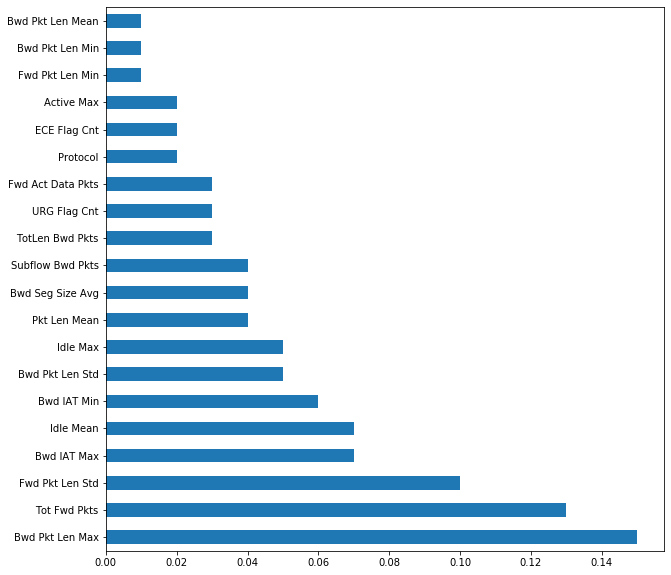

In [8]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Timestamp           0.00
Bwd PSH Flags       0.00
Fwd URG Flags       0.00
Bwd URG Flags       0.00
Pkt Len Min         0.00
SYN Flag Cnt        0.00
CWE Flag Count      0.00
Fwd Byts/b Avg      0.00
Fwd Pkts/b Avg      0.00
Fwd Blk Rate Avg    0.00
Bwd Byts/b Avg      0.00
Bwd Pkts/b Avg      0.00
Bwd Blk Rate Avg    0.00
Active Mean         0.00
Active Std          0.00
Active Min          0.00
Idle Std            0.00
Fwd Pkt Len Min     0.01
Bwd Pkt Len Min     0.01
Bwd Pkt Len Mean    0.01
dtype: float64


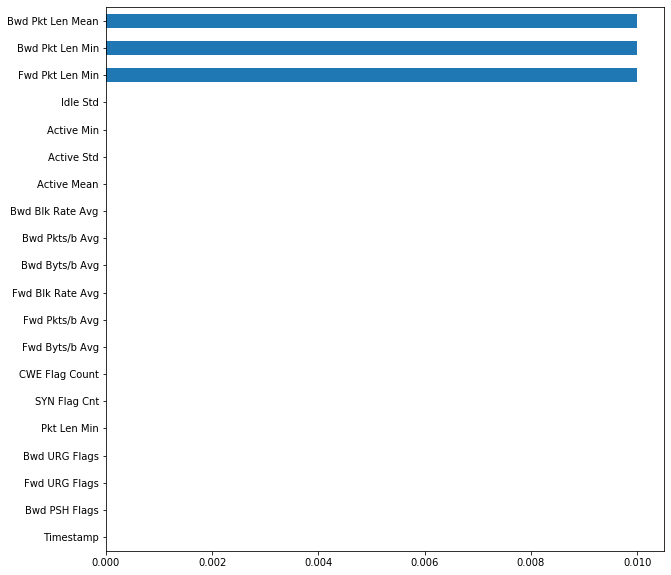

In [9]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))

In [ ]:
model_file_path = r'D:\CIC\Train and Test\Filtered 40 - RF\adaBoost_model_half_hyper_params.sav'
pickle.dump(adaBoost1, open(model_file_path, 'wb'))